# Introduction
This notebook is all about comparing how the top 3 machine learning models and the top 3 deep learning models I built performed on a customer churn prediction task.

While I was curious about which models would perform best, my main focus was on understanding how different architectures, optimizers, and tuning choices affected real-world metrics like precision, recall, and F1 score — not just raw accuracy.

**Key Learning**:


**Keeping it simple works**: More layers or complex tweaks didn’t always lead to better results. Surprisingly, some of the simpler models performed just as well (if not better).

**Accuracy isn't everything**: Accuracy alone is misleading. F1 and Recall were more helpful given churn class imbalance.

**Error analysis helpped alot**: Looking at confusion matrix helped me understand where false negatives were hurting performance.


# Performace analysis

# Key Insights
* Logistic Regression actually surprised me. Despite being a basic model, it did great on recall — likely because of class weighting and regularization.

* DL Models 4 & 6 (both with Adam) were really solid in recall and F1. They were consistent and handled false negatives well.

* Random Forest gave the most balanced performance across all metrics. Still, DL Model 3 (Adagrad) wasn’t far behind in accuracy.

* Even Naive Bayes did better than I expected — probably thanks to how the data was preprocessed and distributed.

* One major issue: most models had pretty high false negative rates. I tried tons of tuning (neurons, dropout, batchnorm, different activations), but nothing helped much — until I used SMOTE, which made a noticeable difference, especially in recall and F1.

# 📊 Evaluation Strategy

* I used stratified sampling to split the dataset, which helped maintain the churn/no-churn ratio in both the training and test sets. Super important when dealing with imbalanced data.

* SMOTE (Synthetic Minority Oversampling Technique) was applied to only the training data to fix class imbalance — not the test data — to avoid data leakage.

* Threshold tuning was also tested as part of my optimization strategy. However, despite adjusting thresholds to prioritize recall or F1-score, the improvements were negligible. This indicated that the models were already well-calibrated post-SMOTE.

* For every model, I tracked four key metrics: Accuracy, Precision, Recall, and F1 Score — so I could get a better view than just relying on accuracy alone.

* Finally, I visualized the results of the top-performing ML and DL models side-by-side using:

 * Heatmaps

 * Bar charts

 * Radar plots

This gave me a clear, visual comparison of how each model stacked up across different metrics.

**Note:** Stratified sampling plays a critical role in fair evaluation by maintaining the original class proportions during data splitting, which is especially important in imbalanced datasets like churn prediction.

In [2]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import seaborn as sns
from IPython.display import Image, display

In [20]:
# @title
ml_data = [
    {"Model": "LogisticRegression", "Type": "ML", "Accuracy": 75.20, "Precision": 51.73, "Recall": 81.03, "F1 Score": 63.15},
    {"Model": "RandomForest", "Type": "ML", "Accuracy": 78.25, "Precision": 58.49, "Recall": 58.81, "F1 Score": 58.65},
    {"Model": "GaussianNB", "Type": "ML", "Accuracy": 72.92, "Precision": 49.01, "Recall": 80.49, "F1 Score": 60.92}
]

dl_data = [
    {"Model": "DL-Adagrad 3", "Type": "DL", "Accuracy": 79.39, "Precision": 54.0, "Recall": 65.0, "F1 Score": 59.0},
    {"Model": "DL-Adam 4", "Type": "DL", "Accuracy": 75.20, "Precision": 50.0, "Recall": 79.0, "F1 Score": 61.0},
    {"Model": "DL-Adam 6", "Type": "DL", "Accuracy": 75.21, "Precision": 49.0, "Recall": 79.0, "F1 Score": 60.0}
]

df = pd.DataFrame(ml_data + dl_data)
df_melted = df.melt(id_vars=["Model", "Type"], var_name="Metric", value_name="Score")

# Deep Learning vs Machine Learning Metric Comparision


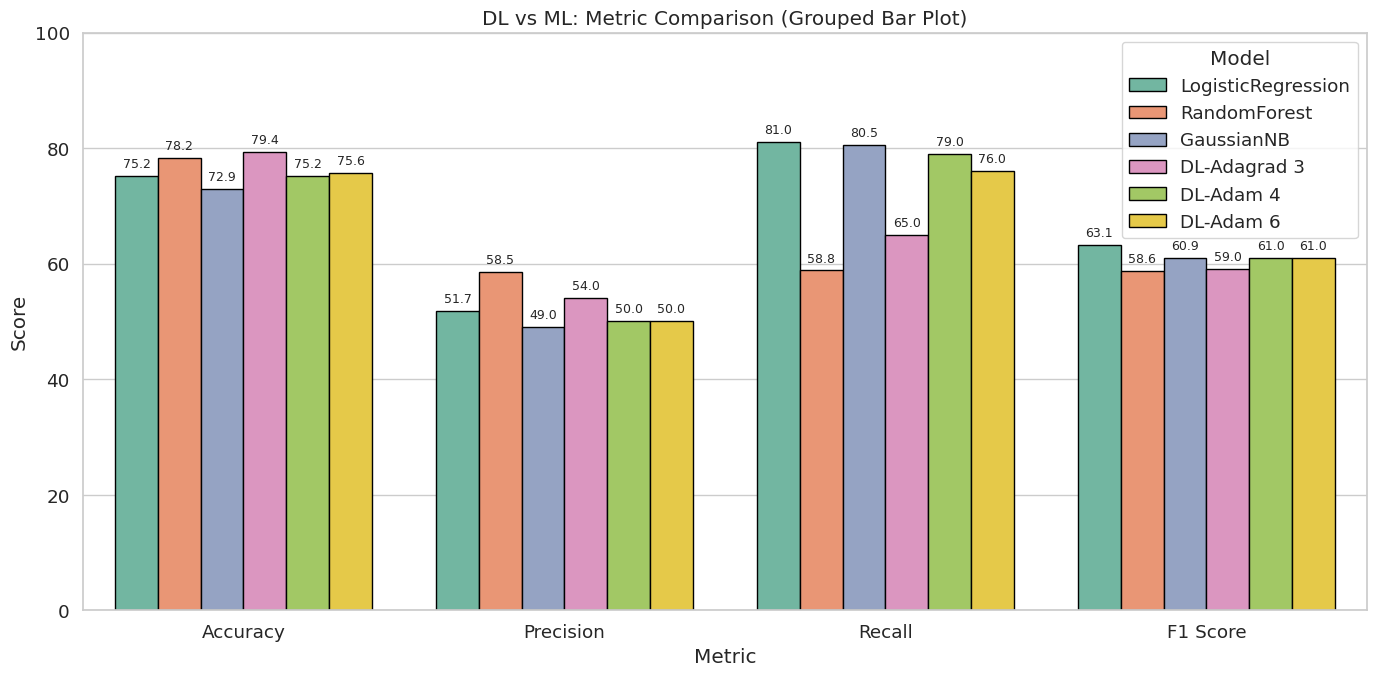

In [21]:
# @title
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid", font_scale=1.2)
bar = sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model", palette="Set2", edgecolor="black")
for p in bar.patches:
    height = p.get_height()
    if height > 0:
        bar.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height + 1),
                     ha='center', va='bottom', fontsize=9)
plt.title("DL vs ML: Metric Comparison (Grouped Bar Plot)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

* This bar chart shows the F1 scores of the top 3 classical ML models and top 3 deep learning models. While Random Forest and Logistic Regression lead the ML side, DL Model 4 (Adam) and Model 6 show strong performance in handling class imbalance with higher recall-driven F1 scores.

# Heatmap

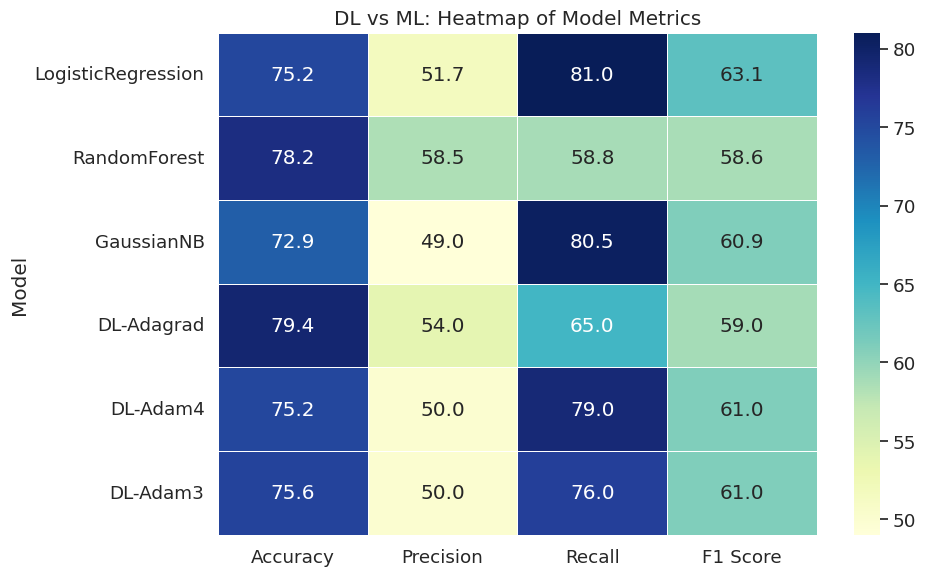

In [5]:
# @title
heatmap_df = df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]]
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5)
plt.title("DL vs ML: Heatmap of Model Metrics")
plt.tight_layout()
plt.show()

* Heatmap of classification metrics across all models. This visual makes it easier to compare trade-offs. For example, high recall often came at the cost of lower precision — especially in DL models optimized with Adam.

# Radar Charts

* Radar chart comparing the top ML and DL models across Accuracy, Precision, Recall, and F1 Score. Random Forest and DL Model 3 (Adagrad) show balanced performance, but DL Model 4 stands out for recall — making it more reliable in identifying churned customers.

In [6]:
# @title
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
num_vars = len(labels)

def create_radar_chart(models, title):
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    for model in models:
        values = df[df["Model"] == model][labels].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, label=model)
        ax.fill(angles, values, alpha=0.1)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_ylim(0, 100)
    ax.set_title(title, y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

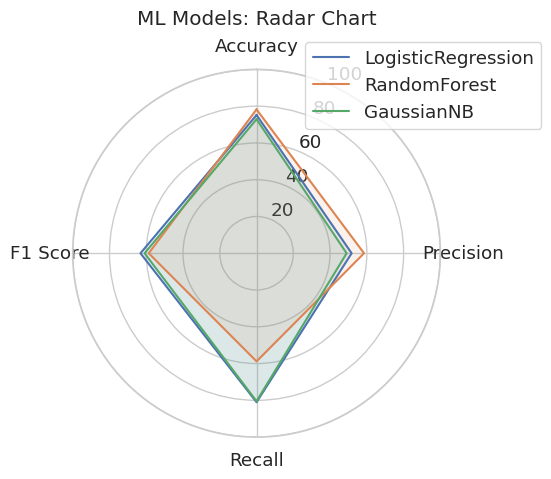

In [7]:
create_radar_chart(["LogisticRegression", "RandomForest", "GaussianNB"], "ML Models: Radar Chart")

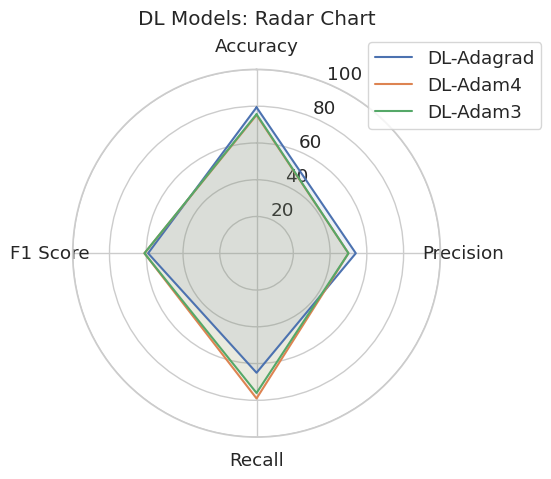

In [8]:
create_radar_chart(["DL-Adagrad", "DL-Adam4", "DL-Adam3"], "DL Models: Radar Chart")

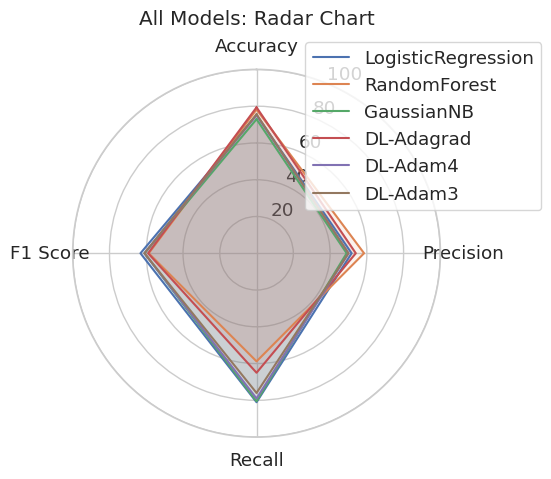

In [9]:
create_radar_chart(df["Model"].tolist(), "All Models: Radar Chart")

# ROC Curve Charts with AUC

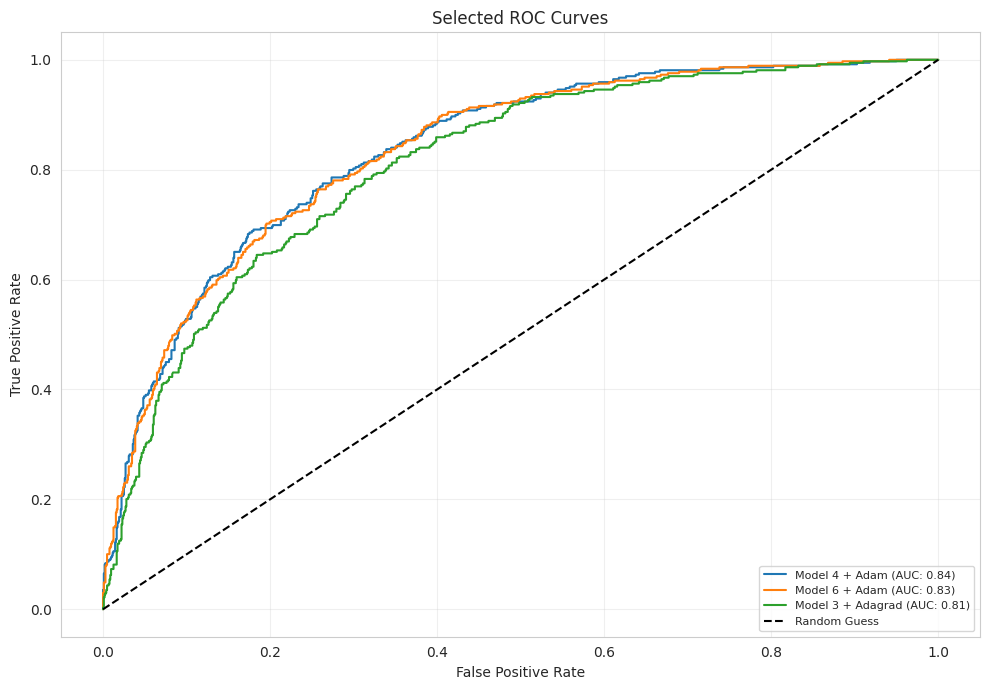

In [10]:
display(Image(filename='DL_ROC.png'))

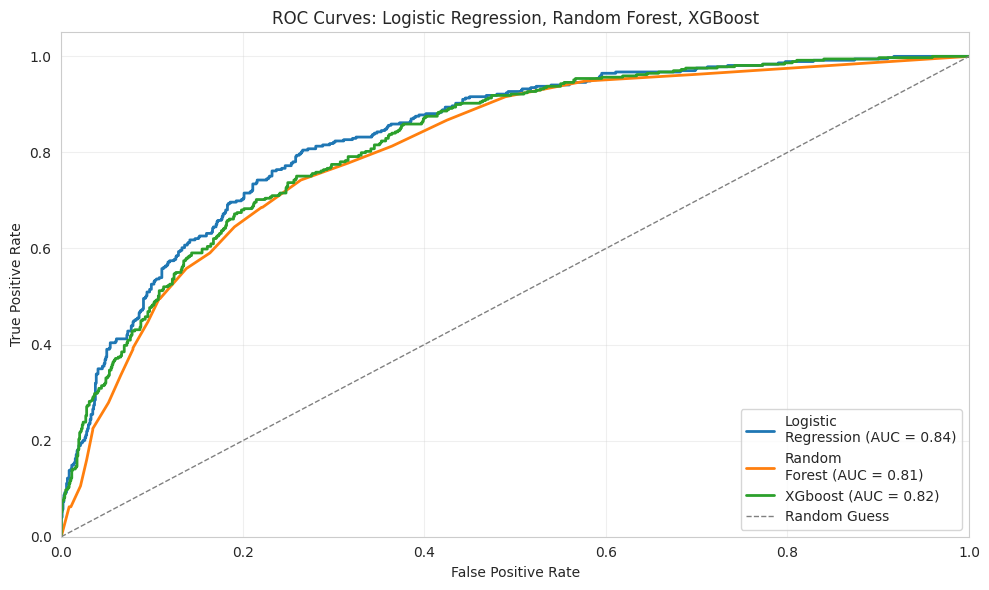

In [11]:
display(Image(filename='ROC_ML.png'))

# Confusion Matrices of the selected models

# Deep Learning models

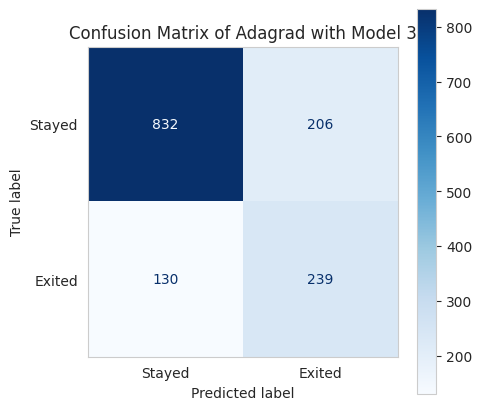

In [14]:
display(Image(filename='adagrad3.png'))

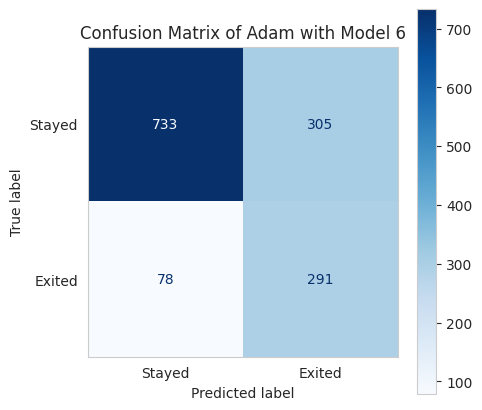

In [15]:
display(Image(filename='adam6.png'))

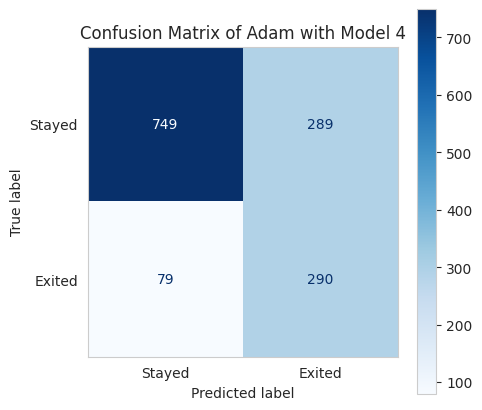

In [16]:
display(Image(filename='adam4.png'))

# Machine Learning Models

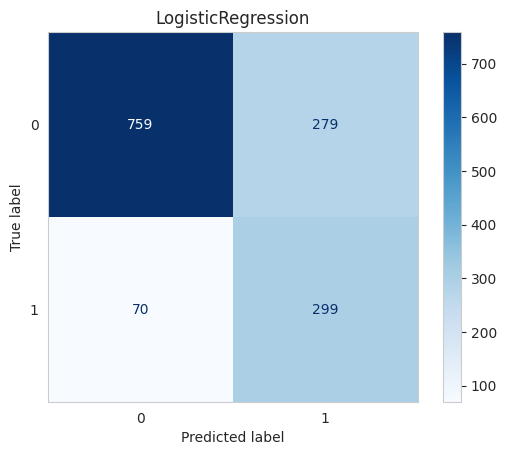

In [19]:
display(Image(filename='lr.png'))

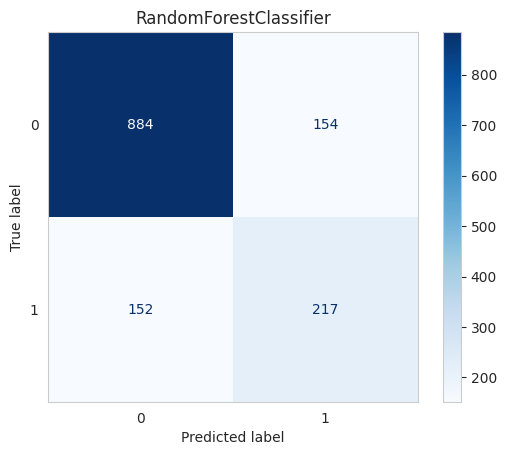

In [17]:
display(Image(filename='rdmf.png'))

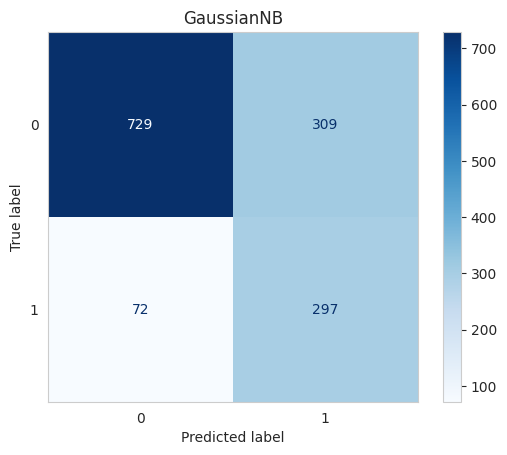

In [22]:
display(Image(filename='gnb.png'))

# **Performance Summary**
* ***Classical ML Models:***

| **Model**                       | **Accuracy** | **Precision** | **Recall** | **F1 Score** | **TN** | **FP** | **FN** | **TP** |
| ------------------------------- | ------------ | ------------- | ---------- | ------------ | ------ | ------ | ------ | ------ |
| **Random Forest (depth=20)**    | 78.25        | 58.49         | 58.81      | 58.65        | 884    | 154    | 152    | 217    |
| **Logistic Regression (C=0.1)** | 75.20        | 51.73         | 81.03      | 63.15        | 759    | 279    | 70     | 299    |
| **GaussianNB**          | 77.19        | 56.94         | 53.39      | 55.10        | 729    | 309   | 72    | 297    |


* ***Deep Learning Models:***

| **Model**      | **Optimizer** | **Accuracy** | **Precision** | **Recall** | **F1 Score** | **TN** | **FP** | **FN** | **TP** |
| -------------- | ------------- | ------------ | ------------- | ---------- | ------------ | ------ | ------ | ------ | ------ |
| **DL Model 3** | Adagrad       | 79.39        | 54.0          | 65.0       | 59.0         | 832    | 206    | 130    | 239    |
| **DL Model 4** | Adam          | 75.20        | 50.0          | 79.0       | 61.0         | 749    | 289    | 79     | 290    |
| **DL Model 6** | Adam          | 73.21        | 49.0          | 79.0       | 60.0         | 733    | 305    | 78     | 291    |



Why Logistic Regression Was the Most Reliable Model
Based on all the experimentation, data analysis, and performance tuning, the most reliable model I arrived at was Logistic Regression.

* While its accuracy was 75.2%, I didn’t rely heavily on accuracy, as it's not the most informative metric in imbalanced datasets like churn prediction. Instead, I focused on:

 * Recall: 81.03% – the highest among all models

 * F1 Score: 63.15% – strong balance between precision and recall

 * Precision: 51.73% – acceptable, though slightly lower

* Although I hoped for a higher precision score, this was an intentional trade-off. In churn prediction, high recall is often more valuable because:

>Catching more actual churners (high recall) helps the company take proactive steps to retain customers — even if it means a few false positives.

* A false negative (missing a real churner) can be more damaging than a false positive (predicting churn when they wouldn’t leave), because losing a customer is costlier than offering a retention incentive to a loyal one.

* For example:

A false negative = a missed opportunity to intervene and retain a customer — leading to revenue loss.

A false positive = a retention offer to a non-churner — possibly a minor cost, but no loss in customer base.

>So even though Logistic Regression is a relatively simple model, it outperformed deeper neural networks and ensemble models in real-world value — making it the best fit for this churn problem.



# Final Summary

Customer churn prediction is essential for businesses aiming to reduce revenue loss by proactively identifying at-risk customers. In this project, I evaluated both classical ML and deep learning models to identify a solution that balances performance with real-world business value.

Despite experimenting with advanced architectures, threshold tuning, and various optimizers, Logistic Regression emerged as the most reliable model, achieving a strong recall of 81.03% and an F1 score of 63.15%. This high recall minimizes false negatives—crucial in churn prediction, where missing a true churner is more costly than wrongly targeting a loyal customer.

Through techniques like SMOTE, stratified sampling, and confusion matrix analysis, I prioritized recall and F1 over raw accuracy. Ultimately, this project reinforced that simple models, when tuned and interpreted correctly, can outperform deeper architectures—especially in high-stakes, imbalanced domains like churn.

